# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [50]:
pd.value_counts(target)

bus     218
saab    217
opel    212
van     199
dtype: int64

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,39,81,45,68,169,73,6,151,44,19,146,173,336,186,75,7,0,183,189
1,197,82,44,72,150,64,7,154,44,19,144,181,350,177,80,0,16,183,187
2,157,93,42,70,131,56,7,127,53,18,145,156,240,152,74,5,4,189,190
3,456,92,43,70,124,52,6,139,49,18,144,164,282,172,79,4,16,183,185
4,711,100,54,102,206,65,10,198,33,23,164,224,587,240,72,4,11,187,196
5,23,87,39,70,148,61,7,143,46,18,136,164,307,141,69,1,2,192,199
6,178,93,37,73,174,68,7,151,43,19,131,175,347,135,68,1,22,196,205
7,677,105,51,80,207,71,6,195,33,22,159,214,579,188,75,6,20,194,194
8,616,92,42,69,153,58,8,140,48,18,138,165,290,151,64,10,21,199,206
9,496,106,55,98,224,68,11,215,31,24,170,222,679,214,68,2,29,189,201


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000
mean,428.941712,93.888889,44.792350,82.411658,168.785064,61.373406,8.437158,168.788707,41.032787,20.588342,147.801457,188.364299,440.418944,174.204007,72.034608,6.306011,12.91439,189.078324,195.808743
std,247.429715,8.345004,6.146972,15.959859,33.338308,6.903460,4.125557,34.062992,8.038390,2.646084,14.280388,32.042944,181.054392,32.986205,6.923242,4.893872,9.01509,6.111440,7.448965
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.00000,176.000000,181.000000
25%,225.000000,88.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,166.000000,314.000000,148.000000,67.000000,2.000000,5.00000,185.000000,191.000000
50%,429.000000,93.000000,44.000000,81.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,71.000000,6.000000,11.00000,189.000000,197.000000
75%,648.000000,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,215.000000,587.000000,197.000000,75.000000,9.000000,19.00000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,306.000000,126.000000,55.000000,265.000000,61.000000,29.000000,182.000000,285.000000,1018.000000,268.000000,118.000000,21.000000,40.00000,204.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler 

'''стандартизируем фичи z = (x - u) / s для корректного сравнения
   и избежания проблем с обусловленностью матрицы X'''
   
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.metrics import f1_score, accuracy_score
from scikitplot.metrics import plot_roc

def print_f1_and_accuracy_scores(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print('F1-score: ', f1_score(y_test, y_pred, average=None), '\n'
          'Accuracy: ', accuracy_score(y_test, y_pred), sep='')


In [9]:
### YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

logistic = LogisticRegression(
    multi_class='multinomial', 
    solver='saga', 
    tol=1e-3, 
    max_iter=500, 
    random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf_log = RandomizedSearchCV(logistic, distributions, cv=5, random_state=42)
search = clf_log.fit(X_train_std, y_train)
search.best_params_

{'C': 3.329770563201687, 'penalty': 'l1'}

F1-score: [0.93181818 0.60992908 0.62411348 0.92647059]
Accuracy: 0.7811447811447811


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

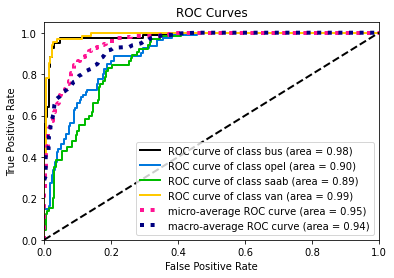

In [10]:
print_f1_and_accuracy_scores(clf_log, X_test_std, y_test)
plot_roc(y_test, clf_log.predict_proba(X_test_std))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [11]:
from sklearn.decomposition import PCA

import plotly.express as px

pca = PCA()
pca.fit(X_train_std)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [12]:
### YOUR CODE HERE

pca = PCA(n_components=12) #  после этого кол-ва компонент explained variance > 95%
pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std) # да, нужно, т.к. в таком случае все переменные будут иметь одинаковый вес для PCA
X_test_pca = pca.transform(X_test_std) 

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [13]:
### YOUR CODE HERE
logistic = LogisticRegression(
    multi_class='multinomial', 
    solver='saga', 
    tol=1e-3, 
    max_iter=500,
    random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf_log_pca = RandomizedSearchCV(logistic, distributions, cv=5, random_state=42)
search = clf_log_pca.fit(X_train_pca, y_train)
search.best_params_

{'C': 2.3946339367881464, 'penalty': 'l2'}

F1-score: [0.85227273 0.6056338  0.61870504 0.89051095]
Accuracy: 0.7474747474747475


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

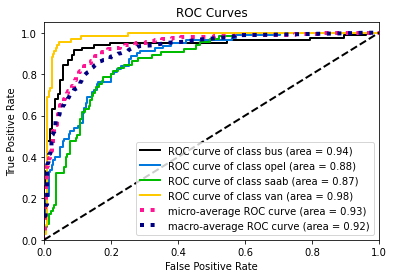

In [14]:
print_f1_and_accuracy_scores(clf_log_pca, X_test_pca, y_test)
plot_roc(y_test, clf_log_pca.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=42)
distributions = dict(max_depth=range(3,25))

clf_tree = GridSearchCV(tree, distributions, cv=5)
search = clf_tree.fit(X_train, y_train)
search.best_params_

{'max_depth': 8}

F1-score: [0.88764045 0.46979866 0.39416058 0.87692308]
Accuracy: 0.6666666666666666


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

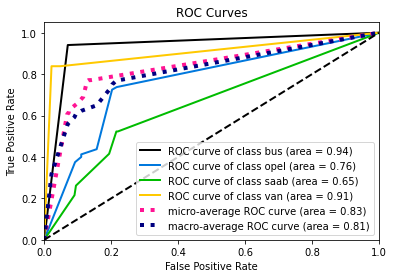

In [16]:
print_f1_and_accuracy_scores(clf_tree, X_test, y_test)
plot_roc(y_test, clf_tree.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [17]:
# YOUR CODE HERE

In [45]:
from sklearn.ensemble import BaggingClassifier

N_min = 2
N_max = 100
step = 5


acc_score_logreg_bag = []
f1_score_logreg_bag = []

acc_score_dt_bag = []
f1_score_dt_bag = []

for N in range(N_min, N_max, step):
    clf_log_1 = LogisticRegression(
        multi_class='multinomial', 
        solver='saga', 
        tol=1e-3, 
        max_iter=500, 
        random_state=42,
        C= 3.329770563201687, 
        penalty= 'l1')
    clf_log_bag = BaggingClassifier(base_estimator=clf_log_1, n_estimators=N, random_state=42, n_jobs=-1)

    
    clf_log_bag.fit(X_train_std, y_train)
    y_pred = clf_log_bag.predict(X_test_std)
    
    acc_score_logreg_bag.append(accuracy_score(y_test, y_pred))
    f1_score_logreg_bag.append(f1_score(y_test, y_pred, average=None))
    
    clf_tree_1 = DecisionTreeClassifier(random_state=42, max_depth=8)
    clf_tree_bag = BaggingClassifier(base_estimator=clf_tree_1, n_estimators=N, random_state=42, n_jobs=-1)
    
    clf_tree_bag.fit(X_train_std, y_train)
    y_pred = clf_tree_bag.predict(X_test_std)
    
    acc_score_dt_bag.append(accuracy_score(y_test, y_pred))
    f1_score_dt_bag.append(f1_score(y_test, y_pred, average=None))

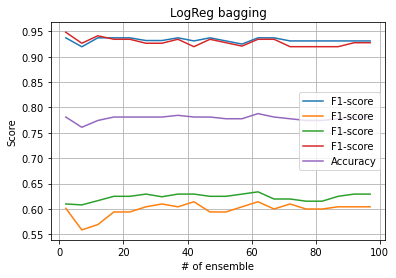

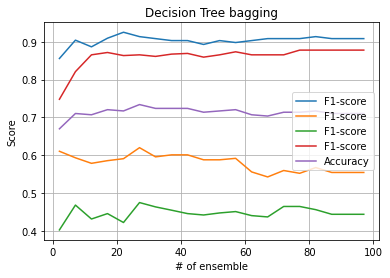

In [48]:
plt.title('LogReg bagging')
plt.plot(range(N_min, N_max, step), f1_score_logreg_bag, label='F1-score')
plt.plot(range(N_min, N_max, step), acc_score_logreg_bag, label='Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('# of ensemble')
plt.ylabel('Score')
plt.show()

plt.title('Decision Tree bagging')
plt.plot(range(N_min, N_max, step), f1_score_dt_bag, label='F1-score')
plt.plot(range(N_min, N_max, step), acc_score_dt_bag, label='Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('# of ensemble')
plt.ylabel('Score')
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
distributions = dict(max_depth=range(2,100), n_estimators=range(10,100))

clf_forest = RandomizedSearchCV(forest, distributions, cv=5, n_iter=300, random_state=42)
search = clf_forest.fit(X_train, y_train)
search.best_params_

{'n_estimators': 62, 'max_depth': 8}

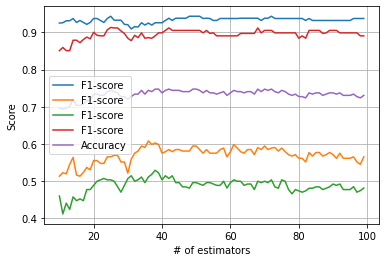

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = []
f1 = []
for i in range(10,100):
    clf = RandomForestClassifier(max_depth=8, random_state=42, n_estimators=i).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average=None))

plt.plot(range(10, 100), f1, label='F1-score')
plt.plot(range(10, 100), acc, label='Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('# of estimators')
plt.ylabel('Score')
plt.show()

F1-score: [0.98113208 0.53333333 0.58598726 0.93706294]
Accuracy: 0.7643097643097643


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

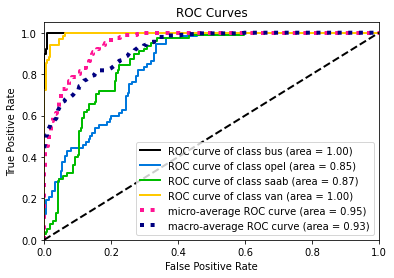

In [ ]:
print_f1_and_accuracy_scores(clf_forest, X_test, y_test)
plot_roc(y_test, clf_forest.predict_proba(X_test))

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

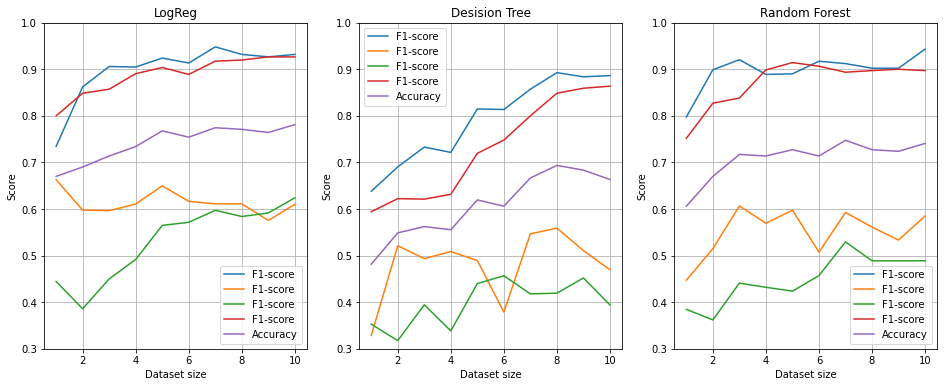

In [44]:
# YOUR CODE HERE

# Чем больше датасет тем в среднем лучше скоры. 

plt.figure(figsize=(16, 6))

acc = [[],[],[]]
f1 = [[],[],[]]
m = X_train.shape[0]
for i in range(1,11):
    clf_log_1 = LogisticRegression(
        multi_class='multinomial', 
        solver='saga', 
        tol=1e-3, 
        max_iter=500, 
        random_state=42,
        C= 3.329770563201687, 
        penalty= 'l1')
    clf_tree_1 = DecisionTreeClassifier(random_state=42, max_depth=8)
    clf_forest_1 = RandomForestClassifier(max_depth=8, random_state=42, n_estimators=62)
    for j, clf in enumerate([clf_log_1, clf_tree_1, clf_forest_1]):
        X_t = X_train_std[:(m * i) // 10 ]
        y_t = y_train[:(m * i) // 10 ]
        clf.fit(X_t, y_t)
        y_pred = clf.predict(X_test_std) 
        acc[j].append(accuracy_score(y_test, y_pred))
        f1[j].append(f1_score(y_test, y_pred, average=None))

title = ['LogReg', 'Desision Tree', 'Random Forest']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    plt.plot(range(1, 11), f1[i], label='F1-score')
    plt.plot(range(1, 11), acc[i], label='Accuracy')
    plt.ylim(0.3, 1)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Dataset size')
    plt.ylabel('Score')
plt.show()